In [84]:
import numpy as np
import pandas as pd

In [85]:
df = pd.read_csv("wine.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [87]:
missing_value = df.isnull()
missing_value

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [88]:
for i in missing_value.columns.values.tolist():
    print(i)
    print(missing_value[i].value_counts())
    print("")
    

type
type
False    6497
Name: count, dtype: int64

fixed acidity
fixed acidity
False    6487
True       10
Name: count, dtype: int64

volatile acidity
volatile acidity
False    6489
True        8
Name: count, dtype: int64

citric acid
citric acid
False    6494
True        3
Name: count, dtype: int64

residual sugar
residual sugar
False    6495
True        2
Name: count, dtype: int64

chlorides
chlorides
False    6495
True        2
Name: count, dtype: int64

free sulfur dioxide
free sulfur dioxide
False    6497
Name: count, dtype: int64

total sulfur dioxide
total sulfur dioxide
False    6497
Name: count, dtype: int64

density
density
False    6497
Name: count, dtype: int64

pH
pH
False    6488
True        9
Name: count, dtype: int64

sulphates
sulphates
False    6493
True        4
Name: count, dtype: int64

alcohol
alcohol
False    6497
Name: count, dtype: int64

quality
quality
False    6497
Name: count, dtype: int64



In [89]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(df.iloc[:, 1:])
df.iloc[:, 1:] = imputer.transform(df.iloc[:, 1:])

In [90]:
missing_values = df.isnull()
for i in missing_values.columns.values.tolist():
    print(i)
    print(missing_values[i].value_counts())
    print("")

type
type
False    6497
Name: count, dtype: int64

fixed acidity
fixed acidity
False    6497
Name: count, dtype: int64

volatile acidity
volatile acidity
False    6497
Name: count, dtype: int64

citric acid
citric acid
False    6497
Name: count, dtype: int64

residual sugar
residual sugar
False    6497
Name: count, dtype: int64

chlorides
chlorides
False    6497
Name: count, dtype: int64

free sulfur dioxide
free sulfur dioxide
False    6497
Name: count, dtype: int64

total sulfur dioxide
total sulfur dioxide
False    6497
Name: count, dtype: int64

density
density
False    6497
Name: count, dtype: int64

pH
pH
False    6497
Name: count, dtype: int64

sulphates
sulphates
False    6497
Name: count, dtype: int64

alcohol
alcohol
False    6497
Name: count, dtype: int64

quality
quality
False    6497
Name: count, dtype: int64



In [91]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['type'] = le.fit_transform(df['type'])
# df['type'].value_counts()

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [93]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
y_pred = model.predict(X_train)

In [95]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9707523571291129

<function matplotlib.pyplot.show(close=None, block=None)>

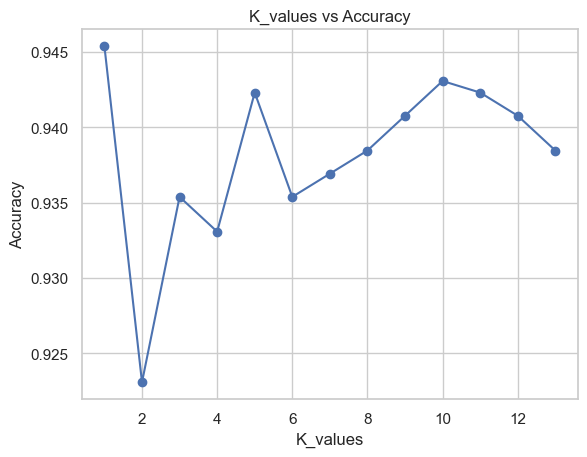

In [96]:
from sklearn.neighbors import KNeighborsClassifier

k_values = np.arange(1, 14)
acc = []
for i in k_values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
import matplotlib.pyplot as plt
plt.plot(k_values, acc, marker='o')
plt.title('K_values vs Accuracy')
plt.xlabel('K_values')
plt.ylabel('Accuracy')
plt.show

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

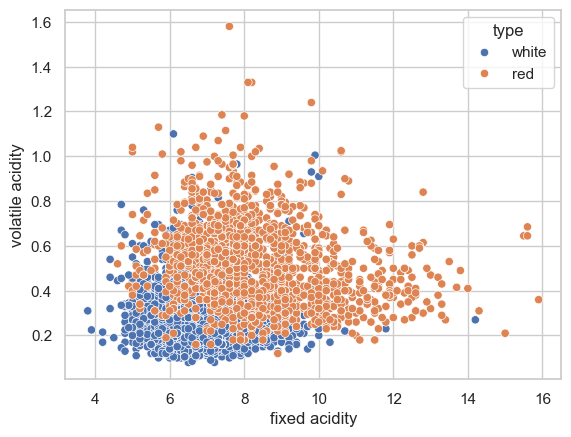

In [97]:
import seaborn as sns

sns.set(style="whitegrid")
sns.scatterplot(x="fixed acidity", y="volatile acidity", hue="type", data=df)

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
y_test.shape
y_pred.shape

(1300,)

<Axes: >

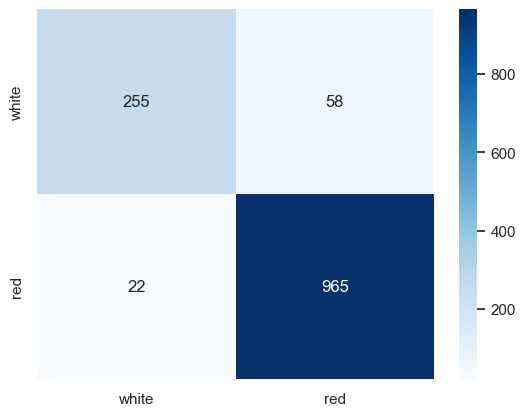

In [102]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df['type'].unique(), yticklabels=df['type'].unique())